In [64]:
import pandas as pd
import numpy as np 
import klib
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df=pd.read_csv('top_expensive_leagues.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League ID                    700 non-null    object 
 1   League Name                  700 non-null    object 
 2   Country                      700 non-null    object 
 3   Sport                        700 non-null    object 
 4   Revenue (USD)                700 non-null    float64
 5   Average Player Salary (USD)  700 non-null    object 
 6   Top Team                     700 non-null    object 
 7   Total Teams                  700 non-null    int64  
 8   Founded Year                 700 non-null    float64
 9   Viewership                   696 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 54.8+ KB


In [4]:
df.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886.0,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977.0,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979.0,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999.0,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963.0,52.83


In [5]:
df['Average Player Salary (USD)'].unique()

array(['12080000.0', '6730000.0', '14360000.0', '13720000.0', '7450000.0',
       '1640000.0', '6670000.0', '3430000.0', 'Los Angeles Lakers',
       '3080000.0', '13780000.0', '1670000.0', '10230000.0', '9440000.0',
       '2480000.0', '14910000.0', '2150000.0', 'Miami Heat', '7580000.0',
       '10800000.0', '5650000.0', '5000000.0', '2360000.0', '3710000.0',
       '1520000.0', '9290000.0', '3330000.0', '3990000.0',
       '8199999.999999999', '6240000.0', '13880000.0', '4240000.0',
       '5590000.0', '8720000.0', '13160000.0', '14080000.0', '8350000.0',
       '13330000.0', '7970000.0', '5760000.0', '6510000.0', '8170000.0',
       '1420000.0', '11190000.0', '4340000.0', '4179999.9999999995',
       '10140000.0', 'Green Bay Packers', '14890000.0', '5550000.0',
       '14960000.0', '11760000.0', '8420000.0', '10990000.0', '1010000.0',
       '11220000.0', '7650000.0', '2800000.0', '12470000.0', '11620000.0',
       '1950000.0', '5350000.0', '3870000.0', '3720000.0', '2580000.0',
  

In [11]:
df['Average Player Salary (USD)']=pd.to_numeric(df['Average Player Salary (USD)'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League ID                    700 non-null    object 
 1   League Name                  700 non-null    object 
 2   Country                      700 non-null    object 
 3   Sport                        700 non-null    object 
 4   Revenue (USD)                700 non-null    float64
 5   Average Player Salary (USD)  697 non-null    float64
 6   Top Team                     700 non-null    object 
 7   Total Teams                  700 non-null    int64  
 8   Founded Year                 700 non-null    float64
 9   Viewership                   696 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.8+ KB


In [15]:
df=df.drop(['League ID'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League Name                  700 non-null    object 
 1   Country                      700 non-null    object 
 2   Sport                        700 non-null    object 
 3   Revenue (USD)                700 non-null    float64
 4   Average Player Salary (USD)  697 non-null    float64
 5   Top Team                     700 non-null    object 
 6   Total Teams                  700 non-null    int64  
 7   Founded Year                 700 non-null    float64
 8   Viewership                   696 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 49.3+ KB


In [19]:
df.isnull().sum()

League Name                    0
Country                        0
Sport                          0
Revenue (USD)                  0
Average Player Salary (USD)    3
Top Team                       0
Total Teams                    0
Founded Year                   0
Viewership                     4
dtype: int64

# data cleaning using klib

In [22]:
df = klib.data_cleaning(df)  
df = klib.clean_column_names(df)

Shape of cleaned data: (700, 9) - Remaining NAs: 7


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.03 MB (-60.0%)



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   league_name                700 non-null    category
 1   country                    700 non-null    category
 2   sport                      700 non-null    category
 3   revenue_usd                700 non-null    float64 
 4   average_player_salary_usd  697 non-null    float32 
 5   top_team                   700 non-null    string  
 6   total_teams                700 non-null    int16   
 7   founded_year               700 non-null    float32 
 8   viewership                 696 non-null    float32 
dtypes: category(3), float32(3), float64(1), int16(1), string(1)
memory usage: 23.6 KB


# filling out missing values 

In [27]:
df['viewership'].fillna(df['viewership'].mean(), inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16108\3785596210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['viewership'].fillna(df['viewership'].mean(), inplace=True)


In [29]:
df['average_player_salary_usd'].fillna(df['average_player_salary_usd'].mean(), inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16108\2608802946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_player_salary_usd'].fillna(df['average_player_salary_usd'].mean(), inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   league_name                700 non-null    category
 1   country                    700 non-null    category
 2   sport                      700 non-null    category
 3   revenue_usd                700 non-null    float64 
 4   average_player_salary_usd  700 non-null    float32 
 5   top_team                   700 non-null    string  
 6   total_teams                700 non-null    int16   
 7   founded_year               700 non-null    float32 
 8   viewership                 700 non-null    float32 
dtypes: category(3), float32(3), float64(1), int16(1), string(1)
memory usage: 23.6 KB


# let's find numerical columns

In [33]:
numerical_cols=df.select_dtypes(include=['int16','float32','float64']).columns

In [35]:
numerical_cols

Index(['revenue_usd', 'average_player_salary_usd', 'total_teams',
       'founded_year', 'viewership'],
      dtype='object')

# calculating skewness for numerical columns

In [38]:
skewness = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 total_teams                  13.119584
average_player_salary_usd     0.048757
revenue_usd                   0.031193
viewership                    0.005817
founded_year                -11.366519
dtype: float64


# the standard formfula for skewness

In [41]:
# If skewness > +0.5 → Right-skewed (log/square root transformation).
# If skewness < -0.5 → Left-skewed (sometimes power transformation).
# If skewness ≈ 0 → Kerak emas.

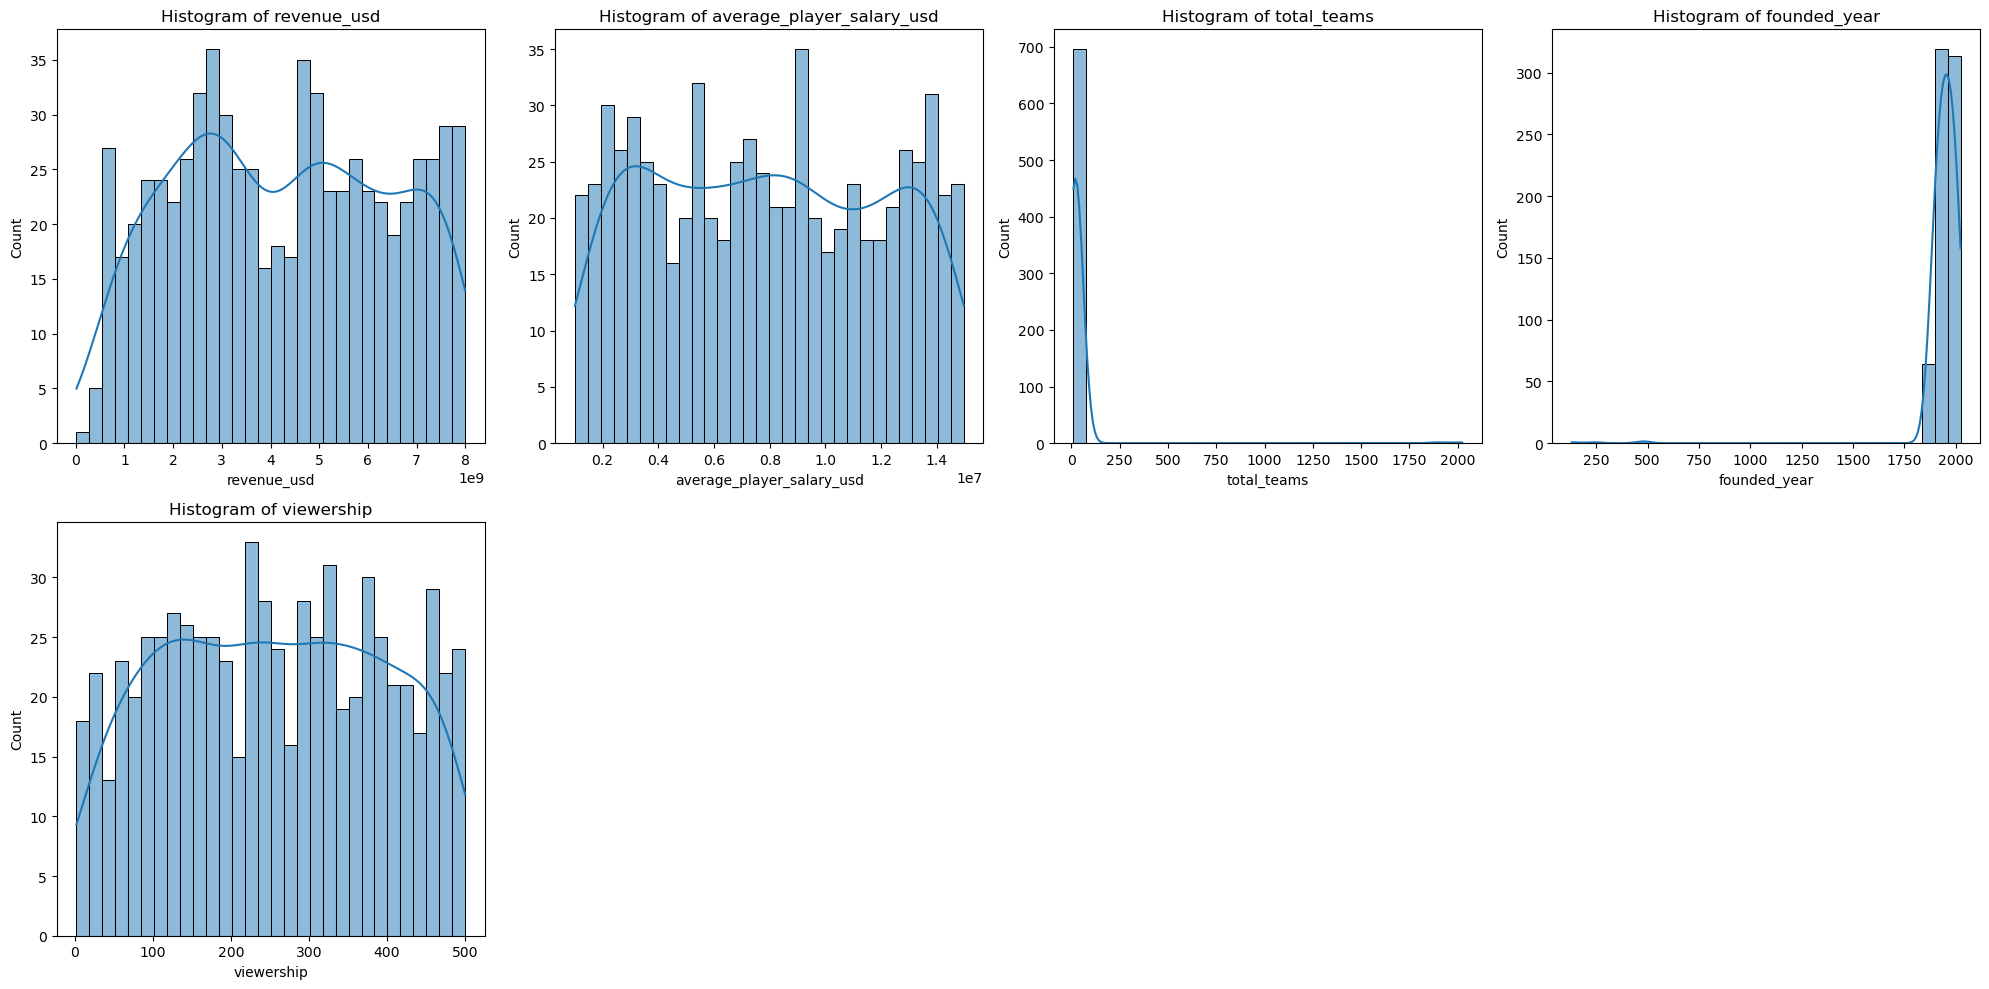

In [43]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()


# Identify features that need transformations (threshold: ±0.5)

In [46]:
skewed_features = skewness[abs(skewness) > 0.5].index.tolist()
print("Features that need transformation:", skewed_features)


Features that need transformation: ['total_teams', 'founded_year']


# let's apply log transformation on total_teams and power on founded_year

In [49]:
df["log_total_teams "] = np.log1p(df["total_teams"])

In [58]:
df["power_founded_year"] = np.power(df["founded_year"], 2)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   league_name                700 non-null    category
 1   country                    700 non-null    category
 2   sport                      700 non-null    category
 3   revenue_usd                700 non-null    float64 
 4   average_player_salary_usd  700 non-null    float32 
 5   top_team                   700 non-null    string  
 6   total_teams                700 non-null    int16   
 7   founded_year               700 non-null    float32 
 8   viewership                 700 non-null    float32 
 9   log_total_teams            700 non-null    float32 
 10  power_founded_year         700 non-null    float32 
dtypes: category(3), float32(5), float64(1), int16(1), string(1)
memory usage: 29.1 KB


In [62]:
df.head()

,league_name,country,sport,revenue_usd,average_player_salary_usd,top_team,total_teams,founded_year,viewership,log_total_teams,power_founded_year
0,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886.0,485.899994,2.833213,3556996.0
1,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977.0,135.009995,2.639057,3908529.0
2,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979.0,157.490005,2.639057,3916441.0
3,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999.0,245.710007,3.135494,3996001.0
4,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963.0,52.830002,2.833213,3853369.0


# Discretization

In [68]:
continuous_features = ['revenue_usd', 'average_player_salary_usd']

# Equal Width Binning 

In [71]:
equal_width = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")

# Equal Frequency Binning

In [74]:
equal_freq = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile") 

In [76]:
for feature in continuous_features:
    # Apply Equal Width Binning
    df[f"{feature}_equal_width"] = equal_width.fit_transform(df[[feature]])
    # Apply Equal Frequency Binning
    df[f"{feature}_equal_freq"] = equal_freq.fit_transform(df[[feature]])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   league_name                            700 non-null    category
 1   country                                700 non-null    category
 2   sport                                  700 non-null    category
 3   revenue_usd                            700 non-null    float64 
 4   average_player_salary_usd              700 non-null    float32 
 5   top_team                               700 non-null    string  
 6   total_teams                            700 non-null    int16   
 7   founded_year                           700 non-null    float32 
 8   viewership                             700 non-null    float32 
 9   log_total_teams                        700 non-null    float32 
 10  power_founded_year                     700 non-null    float32

# scaling qilishdan oldin cardinalitysini topamiz

In [85]:
cat_col=df.select_dtypes(include=['string','category']).columns

In [87]:
cardinality = df[cat_col].nunique()

In [89]:
cardinality

league_name     8
country         7
sport           4
top_team       28
dtype: int64

In [91]:
encoder=LabelEncoder()
for col in cat_col:
    if cardinality[col]>10:
        df[col]=encoder.fit_transform(df[col])
    else:
        df=pd.get_dummies(df,columns=[col],drop_first=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   revenue_usd                            700 non-null    float64
 1   average_player_salary_usd              700 non-null    float32
 2   top_team                               700 non-null    int32  
 3   total_teams                            700 non-null    int16  
 4   founded_year                           700 non-null    float32
 5   viewership                             700 non-null    float32
 6   log_total_teams                        700 non-null    float32
 7   power_founded_year                     700 non-null    float32
 8   revenue_usd_equal_width                700 non-null    float64
 9   revenue_usd_equal_freq                 700 non-null    float64
 10  average_player_salary_usd_equal_width  700 non-null    float32
 11  averag

In [95]:
one_hot_cols = df.select_dtypes(include=bool).columns
df[one_hot_cols] = df[one_hot_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   revenue_usd                            700 non-null    float64
 1   average_player_salary_usd              700 non-null    float32
 2   top_team                               700 non-null    int32  
 3   total_teams                            700 non-null    int16  
 4   founded_year                           700 non-null    float32
 5   viewership                             700 non-null    float32
 6   log_total_teams                        700 non-null    float32
 7   power_founded_year                     700 non-null    float32
 8   revenue_usd_equal_width                700 non-null    float64
 9   revenue_usd_equal_freq                 700 non-null    float64
 10  average_player_salary_usd_equal_width  700 non-null    float32
 11  averag

In [97]:

df = klib.data_cleaning(df)
df = klib.clean_column_names(df)

Shape of cleaned data: (700, 28) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [99]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['revenue_usd', 'average_player_salary_usd', 'top_team', 'total_teams',
       'founded_year', 'viewership', 'log_total_teams', 'power_founded_year',
       'revenue_usd_equal_width', 'revenue_usd_equal_freq',
       'average_player_salary_usd_equal_width',
       'average_player_salary_usd_equal_freq', 'league_name_ipl',
       'league_name_la_liga', 'league_name_ligue_1', 'league_name_nba',
       'league_name_nfl', 'league_name_premier_league', 'league_name_serie_a',
       'country_france', 'country_germany', 'country_india', 'country_italy',
       'country_spain', 'country_usa', 'sport_basketball', 'sport_cricket',
       'sport_football'],
      dtype='object')>

In [111]:
x=['revenue_usd', 'average_player_salary_usd', 'top_team', 'total_teams',
       'founded_year', 'log_total_teams', 'power_founded_year',
       'revenue_usd_equal_width', 'revenue_usd_equal_freq',
       'average_player_salary_usd_equal_width',
       'average_player_salary_usd_equal_freq', 'league_name_ipl',
       'league_name_la_liga', 'league_name_ligue_1', 'league_name_nba',
       'league_name_nfl', 'league_name_premier_league', 'league_name_serie_a',
       'country_france', 'country_germany', 'country_india', 'country_italy',
       'country_spain', 'country_usa', 'sport_basketball', 'sport_cricket',
       'sport_football']

In [113]:
y=df['viewership']

In [115]:
mi_scores = mutual_info_regression(df[x],y)

In [117]:

mi_df = pd.DataFrame({'Feature': x, 'MI_Score': mi_scores})


mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

In [119]:
mi_df

,Feature,MI_Score
1,average_player_salary_usd,0.061910
9,average_player_salary_usd_equal_width,0.061063
10,average_player_salary_usd_equal_freq,0.040535
4,founded_year,0.038255
0,revenue_usd,0.035550
14,league_name_nba,0.030581
6,power_founded_year,0.021719
26,sport_football,0.019634
22,country_spain,0.018279
12,league_name_la_liga,0.015166


In [121]:
# SelectKBest with f_regression
x = df.drop(columns=['viewership'])  
y = df['viewership']


k_best = SelectKBest(score_func=f_regression, k='all') 
k_best.fit(x, y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000026414DC72E0>)

In [123]:
# Get Feature Scores
feature_scores = pd.DataFrame({'Feature': x.columns, 'F_Score': k_best.scores_})

# Sort by Importance
feature_scores = feature_scores.sort_values(by='F_Score', ascending=False)

# Display Results
print(feature_scores)

                                  Feature   F_Score
26                         sport_football  8.515138
11                        league_name_ipl  3.823593
2                                top_team  3.431445
24                       sport_basketball  2.020826
21                          country_italy  1.544343
18                         country_france  1.076995
5                         log_total_teams  1.035581
15                        league_name_nfl  0.874694
20                          country_india  0.636743
13                    league_name_ligue_1  0.563329
16             league_name_premier_league  0.351567
1               average_player_salary_usd  0.349591
10   average_player_salary_usd_equal_freq  0.237624
12                    league_name_la_liga  0.213991
14                        league_name_nba  0.206164
7                 revenue_usd_equal_width  0.203028
9   average_player_salary_usd_equal_width  0.190008
0                             revenue_usd  0.109673
8           

In [125]:
# scaling
scaler_x=StandardScaler()
scaler_y=StandardScaler()
x_scaled=scaler_x.fit_transform(x)
y_scaled=scaler_y.fit_transform(y.values.reshape(-1,1))

# model selection

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   revenue_usd                            700 non-null    float64
 1   average_player_salary_usd              700 non-null    float32
 2   top_team                               700 non-null    int32  
 3   total_teams                            700 non-null    int16  
 4   founded_year                           700 non-null    float32
 5   viewership                             700 non-null    float32
 6   log_total_teams                        700 non-null    float32
 7   power_founded_year                     700 non-null    float32
 8   revenue_usd_equal_width                700 non-null    float32
 9   revenue_usd_equal_freq                 700 non-null    float32
 10  average_player_salary_usd_equal_width  700 non-null    float32
 11  averag

In [132]:
x=df.drop(columns=['viewership'])

In [134]:
y=df['viewership']

In [136]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [138]:
# Scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_val_scaled = scaler_x.transform(x_val)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [140]:
x_train.shape,x_test.shape,x_val.shape

((560, 27), (70, 27), (70, 27))

In [142]:
#Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 17224.767867628707
R2 Score: 0.03686387566827776


In [144]:
#Linear Regression scaled
model=LinearRegression()
model.fit(x_train_scaled,y_train_scaled)
y_pred=model.predict(x_test_scaled)
mse=mean_squared_error(y_test_scaled,y_pred)
r2=r2_score(y_test_scaled,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 0.90083024305013
R2 Score: 0.03686387613025177


In [146]:
# Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 30859.5735581925
R2 Score: -0.7255367563603035


In [148]:
# Decision Tree Scaled
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train_scaled, y_train_scaled)
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 1.6139107119489693
R2 Score: -0.7255367694087229


In [150]:
# Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 20171.38088485011
R2 Score: -0.12789825425543455


In [152]:
# Random Forest scaled
model = RandomForestRegressor(random_state=42)
model.fit(x_train_scaled, y_train_scaled)
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 1.0582027078589011
R2 Score: -0.13139324770535787
